# Handout 7

(5, 8)

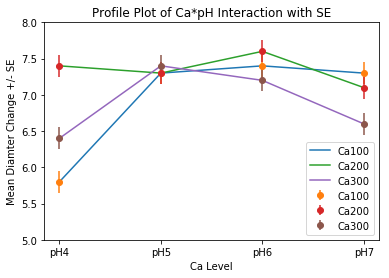

In [17]:
#program on page 17 - profile_withbars.R
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
Ca100 = [5.8,7.3,7.4,7.3]
Ca200 = [7.4,7.3,7.6,7.1]
Ca300 = [6.4,7.4,7.2,6.6]
SE = .153
Ca = pandas.DataFrame({"Ca100":Ca100,
           "Ca200:":Ca200,
           "Ca300":Ca300})
x = [1,2,3,4]
def Bounds(Calci,SE):
    Ly,Uy = [],[]
    for mem in Calci:
        Ly.append(mem-SE)
        Uy.append(mem-SE)
    return [1,2,3,4],[1,2,3,4],Ly,Uy
LxCa100,UxCa100,LyCa100,UyCa100 = Bounds(Ca100,SE)
LxCa200,UxCa200,LyCa200,UyCa200 = Bounds(Ca200,SE)
LxCa300,UxCa300,LyCa300,UyCa300 = Bounds(Ca300,SE)
plt.plot(x,Ca100)
plt.errorbar(x, Ca100, yerr=SE, fmt='o')
plt.plot(x,Ca200)
plt.errorbar(x, Ca200, yerr=SE, fmt='o')
plt.plot(x,Ca300)
plt.errorbar(x, Ca300, yerr=SE, fmt='o')
plt.xlabel("Ca Level")
plt.ylabel("Mean Diamter Change +/- SE")
plt.title("Profile Plot of Ca*pH Interaction with SE")
plt.legend(["Ca100","Ca200","Ca300","Ca100","Ca200","Ca300"])
plt.xticks(x,["pH4","pH5","pH6","pH7"])
plt.ylim(5,8)


In [ ]:
#FactorialCapH.R - similiar analysis to SAS, need to find a better method in Python
y = c(5.2, 5.9, 6.3, 7.1, 7.3, 7.5, 7.6, 7.2, 7.4, 7.2, 7.5, 7.2,
7.6, 7.0, 7.6, 7.5, 7.3, 7.1, 7.6, 7.4, 7.8, 7.4, 7.0, 6.9,
6.4, 6.7, 6.1, 7.3, 7.5, 7.4, 7.2, 7.3, 7.1, 6.8, 6.6, 6.4)
Calcium =c(rep("100",12), rep("200",12), rep("300",12))
Ca = factor(Calcium)
ph = c(rep("4",3),rep("5",3),rep("6",3),rep("7",3),
rep("4",3),rep("5",3),rep("6",3),rep("7",3),
rep("4",3),rep("5",3),rep("6",3),rep("7",3))
pH = factor(ph)
CapH = c(rep("100-4",3), rep("100-5",3), rep("100-6",3), rep("100-7",3),
rep("200-4",3), rep("200-5",3), rep("200-6",3), rep("200-7",3),
rep("300-4",3), rep("300-5",3), rep("300-6",3), rep("300-7",3))
CapH = factor(CapH)
rawE = cbind(y,Ca,pH)
rawE = factor(rawE)
data_Effects = data.frame(rawE)
rawC = cbind(y,CapH)
rawC = factor(rawC)
data_CellMs = data.frame(rawC)
#Effects Model
modelE = lm(y~pH*Ca,data=data_Effects)
summary(aov(modelE))
#Cell Means Model
modelC = lm(y~CapH,data=data_CellMs)
summary(aov(modelC))
#Contrast matrix for linear, quad, and cubic trends
trendmatrix = matrix(c(-1, -1, -1, -1, 0, 0, 0, 0, 1, 1, 1, 1,
1, 1, 1, 1, -2, -2, -2, -2, 1, 1, 1, 1,
-3, -1, 1, 3, -3, -1, 1, 3, -3,-1, 1, 3,
1, -1, -1, 1, 1, -1, -1, 1, 1,-1,-1, 1,
-1, 3, -3, 1, -1, 3, -3, 1, -1, 3,-3, 1),12,5)
trendmatrix = t(trendmatrix)
rownames(trendmatrix) = c("Linear Trend Ca", "Quad Trend Ca", "Linear Trend pH",
                          "Quad Trend pH", "Cubic fit.contrast(modelC, "CapH", trendmatrix)
#Pairwise Comparisons of Ca and pH means:
lsmeans(modelC,"CapH")
#Comparisons with Unadjusted p-values
pairwise.t.test(y,CapH,p.adjust="none")
#Pairwise comparisons yielding Tukey Adjusted p-values
TukeyHSD(aov(y~CapH,data=data_CellMs))
#Print model summaries                          

In [ ]:
#Sample size for Two way Anova?

In [ ]:
#factorial_unequaln.R
options(contrasts = c("contr.sum", "contr.poly"))
rw = c(19,20,21,24,26,22,25,25,19,25,27,21,24,24,31,32,33,32)
dose = c(rep("D1",9), rep("D2",9))
dosefac = factor(dose)
fung = c(rep("F1",3), rep("F2",2), rep("F3",4),
rep("F1",2), rep("F2",3), rep("F3",4))
fungfac = factor(fung)
datafac = cbind(rw,dosefac,fungfac)
modelfac = lm(rw~dosefac + fungfac + dosefac:fungfac)
#outputs Type I Sum of Squares
anova(modelfac)
#outputs Type III Sum of Squares
drop1(modelfac,.~.,test="F")
#Cell Means model
trt = c(rep("D1F1",3),rep("D1F2",2),rep("D1F3",4),
rep("D2F1",2),rep("D2F2",3),rep("D2F3",4))
trtfac = factor(trt)
datatrt = cbind(rw,trtfac)
modeltrt = lm(rw~trtfac)
anova(modeltrt)
#Pairwise Comparisons of Treatment means:
lsmeans(modeltrt,"trtfac")
#Comparisons with Unadjusted p-values
pairwise.t.test(rw,trtfac,p.adjust="none")
#Pairwise comparisons yielding Tukey Adjusted p-values
TukeyHSD(aov(rw~trtfac))

In [ ]:
#zinc sludge contrasts page 61 - cotinued in final pages as well

In [ ]:
#analysis of shrimp data